In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline


df=pd.read_csv('A:/Csv_files/Energy_hourly.csv')

print(df.head())

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0


In [49]:
print(df.info)

print(df.describe())

#print(df.drop.duplicates)

#print(df.columns)

<bound method DataFrame.info of                    Datetime   AEP_MW
0       2004-12-31 01:00:00  13478.0
1       2004-12-31 02:00:00  12865.0
2       2004-12-31 03:00:00  12577.0
3       2004-12-31 04:00:00  12517.0
4       2004-12-31 05:00:00  12670.0
...                     ...      ...
121268  2018-01-01 20:00:00  21089.0
121269  2018-01-01 21:00:00  20999.0
121270  2018-01-01 22:00:00  20820.0
121271  2018-01-01 23:00:00  20415.0
121272  2018-01-02 00:00:00  19993.0

[121273 rows x 2 columns]>
              AEP_MW
count  121273.000000
mean    15499.513717
std      2591.399065
min      9581.000000
25%     13630.000000
50%     15310.000000
75%     17200.000000
max     25695.000000


In [50]:
#Checking null values
print(df.isnull().sum())

Datetime    0
AEP_MW      0
dtype: int64


In [54]:
# Reformat the Date Time Column

#Extract all Data like Year Month Day Time etc
dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week  
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)                 
dataset.info()  
#df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121273 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   AEP_MW  121273 non-null  float64
 1   Month   121273 non-null  int32  
 2   Year    121273 non-null  int32  
 3   Date    121273 non-null  object 
 4   Time    121273 non-null  object 
 5   Week    121273 non-null  UInt32 
 6   Day     121273 non-null  object 
dtypes: UInt32(1), float64(1), int32(2), object(3)
memory usage: 6.1+ MB


In [57]:
#how many unique year do we have in dataset
print(df.Year.unique())

print("Total number of unque year",df.Year.unique())
print(df.AEP_MW.unique())
print(df.Time.unique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]
Total number of unque year [2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018]
[13478. 12865. 12577. ... 21995. 21288. 21725.]
[datetime.time(1, 0) datetime.time(2, 0) datetime.time(3, 0)
 datetime.time(4, 0) datetime.time(5, 0) datetime.time(6, 0)
 datetime.time(7, 0) datetime.time(8, 0) datetime.time(9, 0)
 datetime.time(10, 0) datetime.time(11, 0) datetime.time(12, 0)
 datetime.time(13, 0) datetime.time(14, 0) datetime.time(15, 0)
 datetime.time(16, 0) datetime.time(17, 0) datetime.time(18, 0)
 datetime.time(19, 0) datetime.time(20, 0) datetime.time(21, 0)
 datetime.time(22, 0) datetime.time(23, 0) datetime.time(0, 0)]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Energy Consumption According to year')

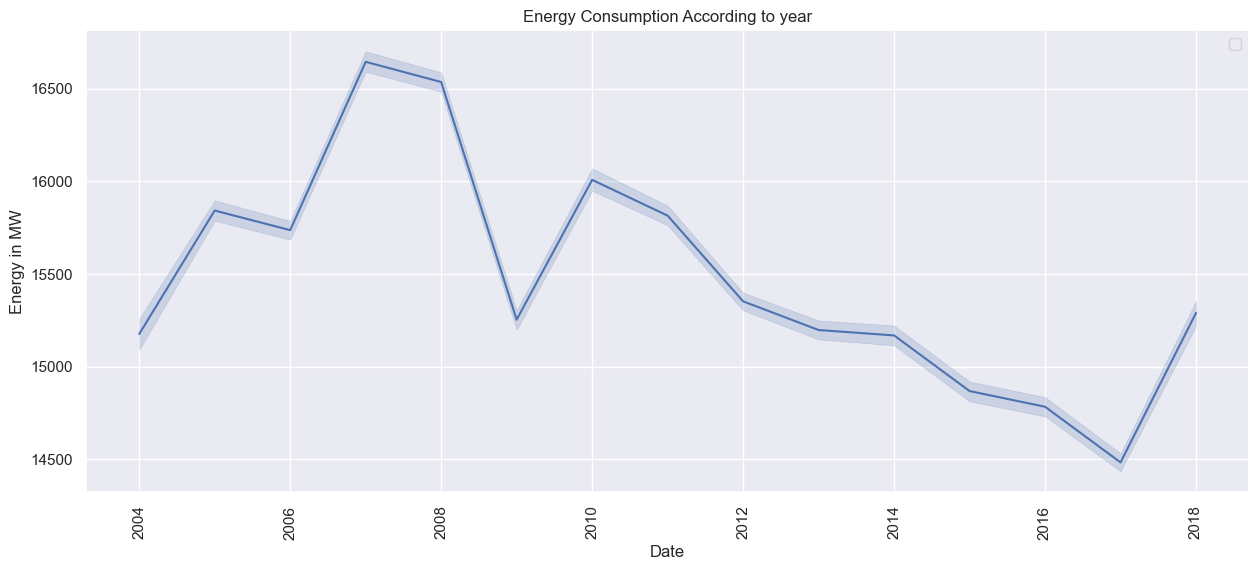

In [58]:
from matplotlib import style
import warnings
warnings.filterwarnings("ignore")

fig=plt.figure()
ax1=plt.subplot2grid((1,1),(0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Year"],y=dataset["AEP_MW"], data=df)
sns.set(rc={'figure.figsize':(15,6)})
plt.title("Energy consumption year 2004")
plt.xlabel("Date")
plt.ylabel("Energy in MW")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.title("Energy Consumption According to year")

    

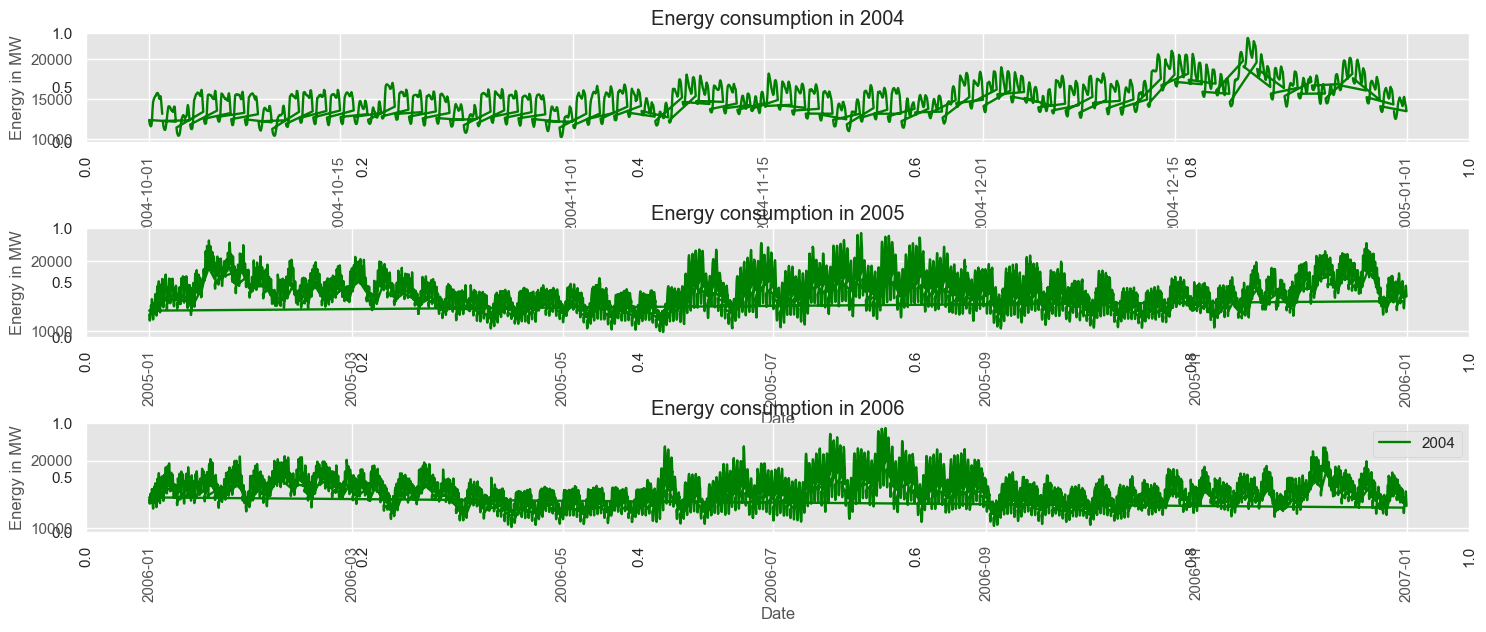

In [59]:
from matplotlib import style
import matplotlib.pyplot as plt

# Assuming 'dataset' is your DataFrame
# Convert index to datetime
dataset.dropna(inplace=True)
dataset.index = pd.to_datetime(dataset.index)

# Extract year from datetime index
dataset['Year'] = dataset.index.year

# Create a figure and subplots
fig = plt.figure()
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

style.use('ggplot')

# Plot data for each year
years = ["2004", "2005", "2006"]
for i, year in enumerate(years, start=1):
    year_data = dataset[dataset['Year'] == int(year)]
    x_data = year_data.index
    y_data = year_data["AEP_MW"]
    ax = fig.add_subplot(3, 1, i)
    ax.plot(x_data, y_data, color="green", linewidth=1.7)
    ax.set_title(f"Energy consumption in {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Energy in MW")
    ax.grid(True, alpha=1)

# Adjust figure size
plt.rcParams["figure.figsize"] = (18, 8)
plt.tight_layout()

# Add legend
plt.legend(years)

# Rotate x-axis labels
for ax in fig.axes:
    for label in ax.xaxis.get_ticklabels():
        label.set_rotation(90)

# Display the plot
plt.show()


Text(0.5, 1.0, 'Energy Distribution')

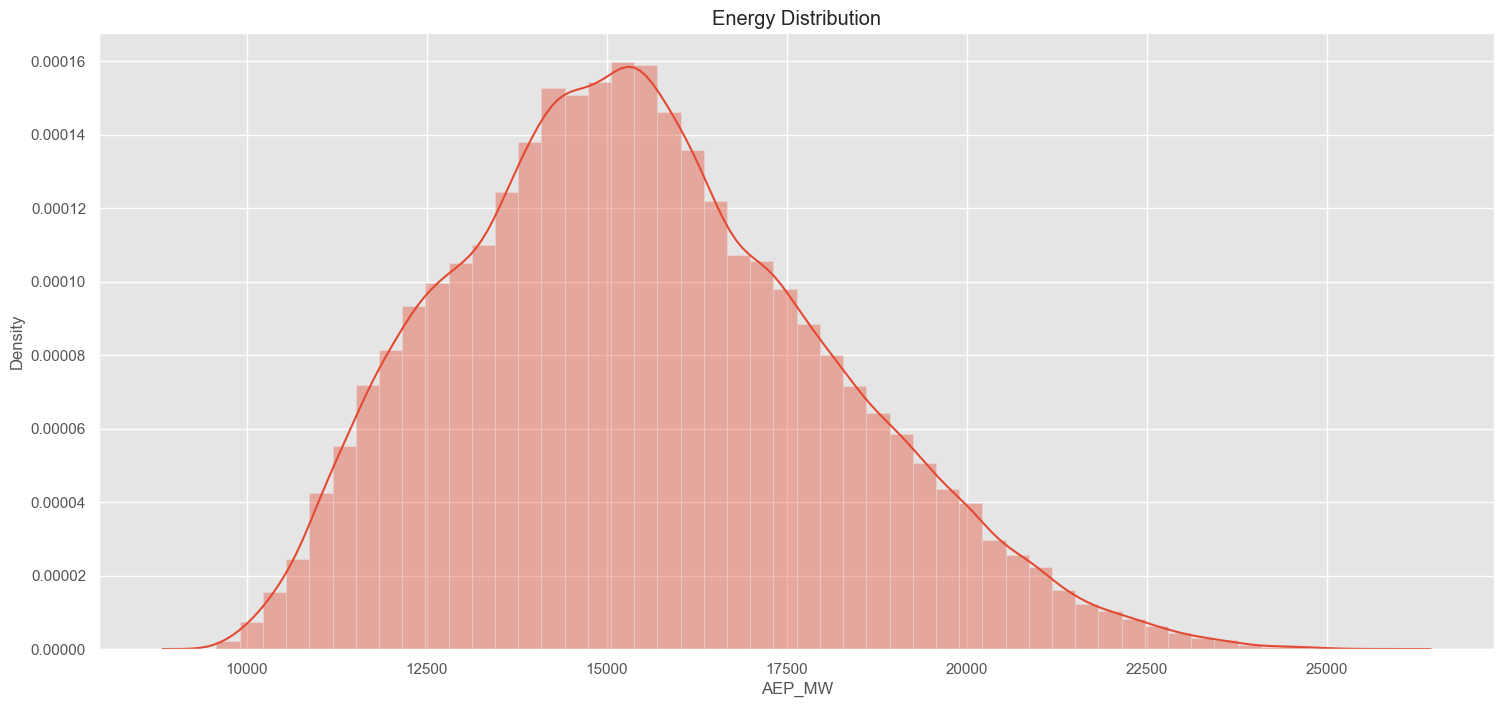

In [60]:
# energy distribution
sns.distplot(dataset["AEP_MW"])
plt.title("Energy Distribution")             
             

KeyError: 'x'

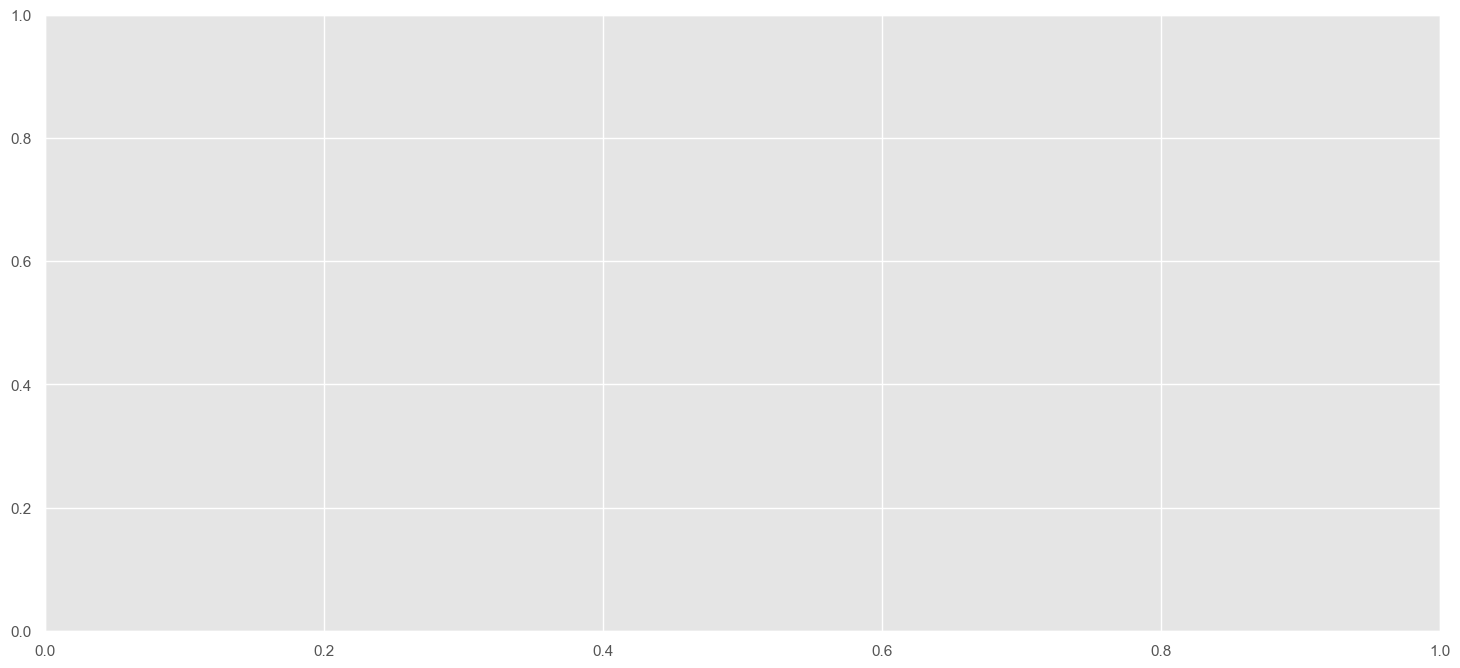

In [70]:
fig = plt.figure()
ax1= fig.add_subplot(111)
df['Time']=pd.to_numeric(df['Time'],errors='coerce')
sns.lineplot(x=df["Time"],y=df["AEP_MW"], data=df)
plt.title("Energy Consumption vs Time ")
plt.xlabel("Time")
plt.grid(True, alpha=1)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

#dataset.dropna(inplace=True)
print(dataset.columns)
#dataset['Time']=pd.to_numeric(dataset['Time'],errors='coerce')
#print(dataset.dtypes)

fig = plt.figure()
ax1 = fig.add_subplot(111)
# Plot energy consumption vs time
#print(df.AEP_MW.unique())
#print(df.Time.unique())
sns.lineplot(X=dataset['Time'], y=dataset['AEP_MW'], data=df)

plt.title("Energy Consumption vs Time")
plt.xlabel("Time")
plt.ylabel("Energy in MW")
plt.grid(True, alpha=1)
#plt.legend()
# Rotate x-axis labels
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)
plt.show()

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
%matplotlib inline


df=pd.read_csv('A:/Csv_files/Energy_hourly.csv')

print(df.head())

dataset = df
dataset["Month"] = pd.to_datetime(df["Datetime"]).dt.month
dataset["Year"] = pd.to_datetime(df["Datetime"]).dt.year
dataset["Date"] = pd.to_datetime(df["Datetime"]).dt.date
dataset["Time"] = pd.to_datetime(df["Datetime"]).dt.time
dataset["Week"] = pd.to_datetime(df["Datetime"]).dt.isocalendar().week  
dataset["Day"] = pd.to_datetime(df["Datetime"]).dt.day_name()
dataset = df.set_index("Datetime")
dataset.index = pd.to_datetime(dataset.index)
dataset.head(1)  
#df.dty

#NewDataset=dataset.resample('D').mean()

              Datetime   AEP_MW
0  2004-12-31 01:00:00  13478.0
1  2004-12-31 02:00:00  12865.0
2  2004-12-31 03:00:00  12577.0
3  2004-12-31 04:00:00  12517.0
4  2004-12-31 05:00:00  12670.0


,AEP_MW,Month,Year,Date,Time,Week,Day
Datetime,,,,,,,
2004-12-31 01:00:00,13478.0,12,2004,2004-12-31,01:00:00,53,Friday


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('A:/Csv_files/Energy_hourly.csv')

# Assuming you have imported necessary libraries, set up DataFrame, and prepared dataset as you mentioned

dataset = df

dataset["Datetime"] = pd.to_datetime(df["Datetime"])  # Convert the 'Datetime' column to datetime format

dataset["Month"] = dataset["Datetime"].dt.month
dataset["Year"] = dataset["Datetime"].dt.year
dataset["Date"] = dataset["Datetime"].dt.date
dataset["Time"] = dataset["Datetime"].dt.time
dataset["Week"] = dataset["Datetime"].dt.isocalendar().week  
dataset["Day"] = dataset["Datetime"].dt.day_name()

# Set 'Datetime' column as index
dataset.set_index("Datetime", inplace=True)

# Drop rows with missing values in 'AEP_MW' column
dataset.dropna(subset=['AEP_MW'], inplace=True)

# Check for duplicate rows
duplicate_rows = dataset.duplicated()
print("Number of duplicate rows:", duplicate_rows.sum())

# Identify columns with non-numeric data types
non_numeric_columns = dataset.select_dtypes(exclude=[np.number]).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns before resampling
numeric_dataset = dataset.drop(columns=non_numeric_columns)

# Resample the dataset to daily frequency and compute the mean
NewDataset = numeric_dataset.resample('D').mean()

# Display the first few rows of the new dataset
print(NewDataset.head())
print(NewDataset.shape)



Number of duplicate rows: 0
Non-numeric columns: Index(['Date', 'Time', 'Day'], dtype='object')
                  AEP_MW  Month    Year  Week
Datetime                                     
2004-10-01  14284.521739   10.0  2004.0  40.0
2004-10-02  12999.875000   10.0  2004.0  40.0
2004-10-03  12227.083333   10.0  2004.0  40.0
2004-10-04  14309.041667   10.0  2004.0  41.0
2004-10-05  14439.708333   10.0  2004.0  41.0
(5055, 4)


In [73]:

print("Old Dataset",dataset.shape)
print("New Dataset",NewDataset.shape)

Old Dataset (121273, 7)
New Dataset (5055, 4)


In [74]:
TestData = NewDataset.tail(100)
Training_Set = NewDataset.iloc[:, 0:1]
Training_Set = Training_Set[:-60]

print('Training Shape', Training_Set.shape)
print('Test Shape', TestData.shape)


Training Shape (4995, 1)
Test Shape (100, 4)


In [80]:
print('Training Shape', Training_Set.shape)
print('Test Shape', TestData.shape)
type(Training_Set)

Training Shape (4995, 1)
Test Shape (100, 4)


numpy.ndarray

In [96]:
from sklearn.preprocessing import MinMaxScaler

Training_Set=Training_Set
sc=MinMaxScaler(feature_range=(0,1))
Train=sc.fit_transform(Training_Set)

In [83]:
X_Train = []
Y_Train = []

# Range should be from 60 values to end
for i in range(60, Training_Set.shape[0]):
    # X_train 0-59
    X_Train.append(Training_Set[i-60:i, :])  # Using NumPy array indexing directly
    # Y_should be 60th value based on past 60 values
    Y_Train.append(Training_Set[i, :])

# Convert into numpy array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)


(4935, 60, 1)
(4935, 1)


In [84]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train.shape

(4935, 60, 1)

In [ ]:
"""
rom keras.optimizers import Adadelta  # Example of a Keras optimizer
from keras.optimizers import Adam  # Example of a Keras optimizer

custom_objects = {'adms': Adadelta, 'adam': Adam}

from keras.models import load_model

with keras.utils.custom_object_scope(custom_objects):
    model = load_model('your_model.h5')
"""    

In [98]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()  # Disable TensorFlow v2 behavior
tf.enable_eager_execution()  # Enable eager execution

from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.optimizers import RMSprop, SGD
from keras.losses import MeanSquaredError

# Choose the optimizer you want to use
optimizer = RMSprop()  # or optimizer = SGD()

regressor = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_Train.shape[1],1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM Layer and some Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM Layer And Some Dropout regularisation
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN with the chosen optimizer
regressor.compile(optimizer=optimizer, loss='mean_squared_error')


ValueError: tf.enable_eager_execution must be called at program startup.

In [88]:

regressor.fit(X_Train, Y_Train, epochs = 5, batch_size = 32)

Train on 4935 samples
Epoch 1/5
4935/4935 [==============================] - 8s 2ms/sample - loss: 232049157.3431
Epoch 2/5
4935/4935 [==============================] - 9s 2ms/sample - loss: 231828325.1777
Epoch 3/5
4935/4935 [==============================] - 9s 2ms/sample - loss: 231623431.6871
Epoch 4/5
4935/4935 [==============================] - 10s 2ms/sample - loss: 231360182.7210
Epoch 5/5
4935/4935 [==============================] - 10s 2ms/sample - loss: 231135187.2584


In [3]:
TestData['Month'] = TestData['Month'].astype(int)
TestData['Week']=TestData['Week'].astype(int)
TestData['Year']=TestData['Year'].astype(int)
TestData.head()


NameError: name 'TestData' is not defined

In [88]:
TestData.shape

(100, 4)

In [89]:
NewDataset.shape

(5055, 4)

In [97]:
Df_Total=pd.concat((NewDataset[["AEP_MW"]],TestData[["AEP_MW"]]),axis=0)

In [98]:
Df_Total.shape

(5155, 1)

In [99]:
inputs=Df_Total[len(Df_Total)-len(TestData)-60:].values
inputs.shape

(160, 1)

In [100]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

sc.fit(Training_Set)

inputs=Df_Total[len(Df_Total)-len(TestData)-60:].values
#we need to Reshaape
inputs=inputs.reshape(-1,1)

#Normalize the Dataset
inputs=sc.transform(inputs)

X_test = []
for i in range(60,160):
    X_test.append(inputs[i-60:i])

#convert into Numpy Array
X_test=np.array(X_test)

#Reshape before Passing to network
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

#pass to model
predicted_stock_price= regressor.predict(X_test)

#Do inverse Transformation to get values
predicted_stock_price = sc.inverse_transform(predicted_stock_price)




In [217]:
"""
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()
"""

In [2]:


True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = predicted_stock_price
dates = TestData.index.to_list()
"""
# Assuming TestData contains the test data
dates = TestData.index[-100:]  # Extracting the last 100 dates from the index of TestData

# Assuming True_MegaWatt contains the true mega-watt values
True_MegaWatt = TestData.values[-100:].flatten()

# Assuming predicted_stock_price contains the predicted mega-watt values
Predicted_MegaWatt = regressor.predict(X_test).flatten()
"""
# Ensure all arrays have the same length
#if len(dates) == len(True_MegaWatt) == len(Predicted_MegaWatt):
Machine_Df = pd.DataFrame(data={
    "Date": dates,
    "TrueMegaWatt": True_MegaWatt,
    "PredictedMeagWatt": [x[0] for x in Predicted_MegaWatt ]
})
print(Machine_Df)


    

NameError: name 'TestData' is not defined

In [243]:
#Future Predicted
print(Machine_Df)

         Date  TrueMegaWatt  PredictedMeagWatt
0  2018-04-26  13157.791667          4747310.5
1  2018-04-27  12964.000000          4747310.5
2  2018-04-28  12237.583333          4747310.5
3  2018-04-29  12156.791667          4747310.5
4  2018-04-30  13443.500000          4747310.5
..        ...           ...                ...
95 2018-07-30  15368.083333          4747310.5
96 2018-07-31  15180.291667          4747310.5
97 2018-08-01  15151.166667          4747310.5
98 2018-08-02  15687.666667          4747310.5
99 2018-08-03  14809.000000          4747310.5

[100 rows x 3 columns]


In [ ]:
True_MegaWatt = TestData["AEP_MW"].to_list()
Predicted_MegaWatt  = [x[0] for x in Predicted_MegaWatt ]
dates = TestData.index.to_list()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


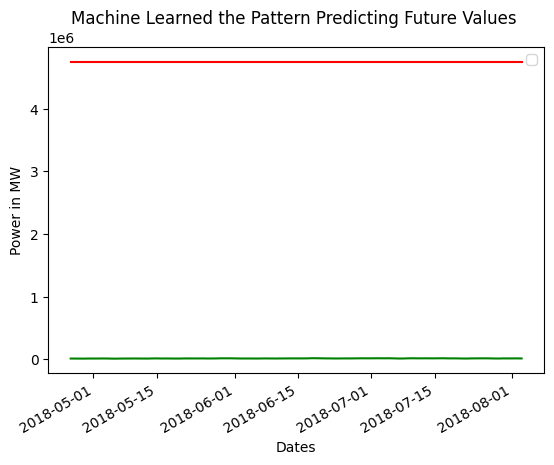

In [229]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_MegaWatt

y1 = Predicted_MegaWatt

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()
plt.show()